In [1]:
################# SATURDAYSAI #################
### Importación de las librerías necesarias ###
###############################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

from pylab import rcParams

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier
from collections import Counter

rcParams['figure.figsize'] = 14, 8.7 # Golden Mean
LABELS = ["1","2"]

from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest

%matplotlib inline

# Carga de datos

In [2]:
### Importación de la Base de datos ###
file = "./EstudioPrevalencia2015.xlsx"
xl = pd.ExcelFile(file)

In [3]:
print(xl.sheet_names)

['Hoja1', 'BBDD fichero total', 'títulos y códigos']


In [4]:
df=xl.parse('BBDD fichero total')

In [5]:
# for column in df.columns:
#     print(str(column))
df.head(10)

,numero,modalidad,P0R1,P0B,POB1,P0B2,P0C,P0F1,POF2,POF3,...,DB4,DB5,DB6,DB6B,DB7,DB8,PESO,PESO1,revisadas_personales,revisadas_telefónicas
0,1006,1,9,4,4,32,1,1,1.0,2.0,...,4,2,2,NaN,1,3,1.128607,1.128607,NaN,NaN
1,1007,1,3,5,6,52,1,1,1.0,2.0,...,5,1,1,NaN,1,1,1.100234,1.100234,NaN,NaN
2,1008,1,4,5,8,67,2,1,1.0,2.0,...,100,4,5,NaN,1,4,1.196041,1.196041,NaN,NaN
3,1009,1,5,5,7,60,2,1,1.0,2.0,...,100,2,3,NaN,1,3,1.062141,1.062141,NaN,NaN
4,1010,1,5,5,6,51,2,1,1.0,2.0,...,5,2,3,NaN,1,3,1.062141,1.062141,NaN,1.0
5,1011,1,5,5,3,18,1,1,1.0,2.0,...,2,99,1,NaN,1,3,1.062141,1.062141,NaN,NaN
6,1012,1,5,5,4,27,2,1,1.0,1.0,...,4,1,1,NaN,1,3,0.720738,0.753777,NaN,NaN
7,1013,1,5,5,4,34,2,1,1.0,2.0,...,100,2,2,NaN,1,2,1.062141,1.062141,NaN,NaN
8,1014,1,5,5,7,62,1,1,2.0,NaN,...,100,2,3,NaN,1,2,1.062141,1.062141,NaN,NaN
9,1015,1,9,1,4,34,2,2,NaN,NaN,...,6,2,2,NaN,1,2,1.128607,1.128607,NaN,1.0


In [6]:
df.describe()

,numero,modalidad,P0R1,P0B,POB1,P0B2,P0C,P0F1,POF2,POF3,...,DB4,DB5,DB6,DB6B,DB7,DB8,PESO,PESO1,revisadas_personales,revisadas_telefónicas
count,6816.000000,6816.0,6816.000000,6816.000000,6816.000000,6816.000000,6816.000000,6816.000000,5202.000000,4669.000000,...,6816.000000,6816.000000,6816.000000,149.000000,6816.000000,6816.000000,6816.000000,6816.000000,660.0,1307.0
mean,4577.223738,1.0,8.456719,3.571156,5.777142,47.907864,1.516432,1.236796,1.102461,1.911544,...,39.057072,2.367811,2.843603,5.993289,1.098005,2.488116,1.050457,1.046409,1.0,1.0
std,2076.015852,0.0,4.826821,1.763138,1.626472,17.571003,0.499767,0.425147,0.303282,0.283987,...,46.042025,6.428943,6.887837,1.646030,2.087890,7.864340,0.181920,0.182712,0.0,0.0
min,1006.000000,1.0,1.000000,1.000000,3.000000,18.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,5.000000,1.000000,0.000000,0.175572,0.131613,1.0,1.0
25%,2777.750000,1.0,5.000000,2.000000,4.000000,34.000000,1.000000,1.000000,1.000000,2.000000,...,4.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.082998,1.082998,1.0,1.0
50%,4565.500000,1.0,9.000000,4.000000,6.000000,46.000000,2.000000,1.000000,1.000000,2.000000,...,5.000000,2.000000,2.000000,5.000000,1.000000,2.000000,1.107651,1.107651,1.0,1.0
75%,6359.250000,1.0,13.000000,5.000000,7.000000,62.000000,2.000000,1.000000,1.000000,2.000000,...,100.000000,2.000000,3.000000,7.000000,1.000000,3.000000,1.115778,1.115778,1.0,1.0
max,8240.000000,1.0,19.000000,6.000000,8.000000,95.000000,2.000000,2.000000,2.000000,2.000000,...,100.000000,100.000000,100.000000,16.000000,100.000000,100.000000,1.196041,1.196041,1.0,1.0


# Limpieza de los datos

In [7]:
# Declaración de funciones para limpiar el Dataframe

def change_99_100(x):
    if (type(x) == int or type(x) == float) and x >= 99.0:
      return None
    else :
      return x

def change_column_P23(x):
    if (type(x) == int or type(x) == float) and x >= 2.0:
      return 2
    else :
      return 1

def cleanDataset(df):
  print("Tamaño del dataframe antes de limpieza ", df.shape)

  new_df = df[df['P23'] <= 3]
  print("Eliminadas filas que no han contestado a la variable objetivo ", new_df.shape )

  new_df = new_df.apply(change_99_100)
  print("Eliminados los valores de 99 o 100", new_df.shape)

  new_df['P23'] = new_df['P23'].apply(change_column_P23)
  print("Unificados Valores de P23 2 y 3 en solo 2", new_df.shape)

  new_df = new_df.dropna(axis=1, how='any')
  print("Eliminadas todas las columnas con al menos un valor nulo", new_df.shape)

  new_df = new_df.drop(['numero', 'modalidad'],1)
  print("Eliminadas columnas que no aportan valor ", new_df.shape)

  new_df = new_df[['P0R1','P0B','POB1','P0C','P3','P4','P5','P6','P7','P8','P9','P11',
                   'P13','P15A','P16A','P18A','P18B','P18C','P20','P20','P22','P24','P26',
                   'P28','P29','P30','P31','P32','P33','P34','P35','P38SP1','P38SP2',
                   'P38SP3','P38SP4','P38SP5','P38SP6','P38SP7','P38SP8','P38SP9',
                   'P39','P41','P43','P46','DB0','DB1','DB3','DB4','DB5','DB6','DB7','DB8', 'P23'
                  ]]
  print("Después del análisis del investigador dejamos las columnas más interesantes ", new_df.shape)

  return new_df

In [8]:
new_df = cleanDataset(df)
# new_df.describe()
print(type(new_df))
print(type(df))
# Variables del experto ya eliminadas previamente
# df[['P50', 'DB2', 'P47', 'P38SP10', 'POF3']].describe()

Tamaño del dataframe antes de limpieza  (6816, 240)
Eliminadas filas que no han contestado a la variable objetivo  (5159, 240)
Eliminados los valores de 99 o 100 (5159, 240)
Unificados Valores de P23 2 y 3 en solo 2 (5159, 240)
Eliminadas todas las columnas con al menos un valor nulo (5159, 127)
Eliminadas columnas que no aportan valor  (5159, 125)
Después del análisis del investigador dejamos las columnas más interesantes  (5159, 53)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [ ]:
### Número de valores únicos en cada columna ###
# print(new_df.nunique())

# Análisis estadístico

In [ ]:
new_df.columns

In [ ]:
### Variable Objetivo ###
plot= new_df['P23'].value_counts().plot(kind='barh', title="Variable objetivo") 

In [ ]:
### Tabla Variable objetivo - Comunidad autónoma ###
pd.crosstab(new_df['P23'], new_df['P0R1'], margins=True)


In [ ]:
sns.set()
%config InlineBackend.figure_format='retina'
sns.countplot(x='P0R1', hue='P23', data=new_df);

In [ ]:
new_df['P23'].unique()

In [ ]:
### Histograma de la edad ###
sns.distplot(new_df['POB1'])

In [ ]:
### Histograma ###
log_edad = np.log(new_df['POB1'])
plt.hist(log_edad)

In [ ]:
### Histograma del sexo ###
sns.distplot(new_df['P0C'])

In [ ]:
### Histograma Estado de Salud ###
sns.distplot(new_df['P28'])

In [ ]:
print(*new_df.columns.to_list(), sep=', ')
# print(new_df.columns.to_list())

In [ ]:
new_df.dtypes

In [ ]:
new_df=new_df.dropna()

In [ ]:
new_df.describe()

In [ ]:
### Relaciones entre las features ###
correlation = new_df.corr()
display(correlation)
plt.figure(figsize=(14, 12))

In [ ]:
### Relaciones entre las features ###
correlation = new_df.corr()
display(correlation)
plt.figure(figsize=(14, 12))
import seaborn as sns
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

In [ ]:
new_df["P23"].value_counts()

In [ ]:
plot= new_df["P23"].value_counts().plot(kind='barh', title="Dependiente") 

# Creación de los conjuntos de Train y Test

In [ ]:
y = new_df['P23']
X = new_df.drop('P23', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [ ]:
print('X train Shape: ' , X_train.shape, '; Y train Shape: ' , y_train.shape)
print('X test Shape: ' , X_test.shape, '; Y test Shape: ' , y_test.shape)

# Generación de datos sintéticos

In [ ]:
### Balanceo SMOTE ###
from imblearn.combine import SMOTETomek

os_us = SMOTETomek()
X_train_res, y_train_res = os_us.fit_sample(X_train, y_train)

print ("Distribution of class labels before resampling {}".format(Counter(y_train)))
print ("Distribution of class labels after resampling {}".format(Counter(y_train_res)))

In [ ]:
plot= y_train.value_counts().plot(kind='barh', title="Clase Objetivo Antes del Balanceo") 

In [ ]:
plot= y_train_res.value_counts().plot(kind='barh', title="Clase Objetivo DESPUES del Balanceo") 

# Entrenamiento y Evaluación de Modelos

In [ ]:
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))
    
#     Modelos de Regresión Lineal
def run_Logistic_Regression_model(X_train, X_test, y_train, y_test):
    clf_base = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg")
    clf_base.fit(X_train, y_train)
    return clf_base
 
model = run_Logistic_Regression_model(X_train_res, X_test, y_train_res, y_test)
    

In [ ]:
### Random Forest Classifier ###
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error

def get_mae_rf(num_est, predictors_train, predictors_val, targ_train, targ_val):
    
    # fitting model with input max_leaf_nodes
    model = RandomForestClassifier(n_estimators=num_est, random_state=0,  bootstrap = True,verbose=1,
                               max_features = 'sqrt')

    # fitting the model with training dataset
    model.fit(predictors_train, targ_train)

    # making prediction with the test dataset
    preds_val = model.predict(predictors_val)

    # calculate and return the MAE
    mae = mean_absolute_error(targ_val, preds_val)
    return(mae)

In [ ]:
plot_mae = {}
for num_est  in range(2,50):
    my_mae = get_mae_rf(num_est,X_train_res,X_test,y_train_res,y_test)
    plot_mae[num_est] = my_mae

In [ ]:
plt.plot(list(plot_mae.keys()),list(plot_mae.values()))
plt.show()

In [ ]:
 # fitting model with input max_leaf_nodes
model = RandomForestClassifier(n_estimators=20, random_state=0,  bootstrap = True,verbose=2,
                           max_features = 'sqrt')

# fitting the model with training dataset
model.fit(X_train, y_train)

In [ ]:
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)

In [ ]:
### Balanceo SMOTE ###

os_us = SMOTETomek()
X_train_res, y_train_res = os_us.fit_sample(X_train, y_train)

print ("Distribution of class labels before resampling {}".format(Counter(y_train)))
print ("Distribution of class labels after resampling {}".format(Counter(y_train_res)))

In [ ]:
plot= y_train.value_counts().plot(kind='barh', title="Dependiente") 

In [ ]:
plot= y_train_res.value_counts().plot(kind='barh', title="Dependiente") 

In [ ]:
model = run_Logistic_Regression_model(X_train_res, X_test, y_train_res, y_test)

In [ ]:
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)

# Análisis de componentes principales (PCA)

In [9]:
RANDOM_STATE = 17  # Semilla para generar número aleatorio
scaler = StandardScaler()  # Estandarizamos los datos
# Seleccionamos el mínimo número de componentes para cubrir el 90% de la varianza:
pca = PCA(n_components=0.9, random_state=RANDOM_STATE)

scaled_data = scaler.fit_transform(new_df.drop('P23', axis=1))
pca.fit(scaled_data)

print("Número total de componentes: %d" % pca.n_components_)
# Porcentaje de varianza explicado por cada uno de los componentes
print(pca.explained_variance_ratio_*100)

Número total de componentes: 37
[10.32197703  5.09383817  4.45455193  4.07165903  3.77674773  3.68736802
  3.49635575  3.16863822  2.82092703  2.67906079  2.48364996  2.39464807
  2.28832793  2.21729988  2.09135826  2.07085658  1.99844948  1.97994206
  1.90939297  1.89870366  1.85706062  1.84095812  1.80287397  1.7256066
  1.69433173  1.6364559   1.60964313  1.5362805   1.51187814  1.44678974
  1.43081598  1.36872281  1.33026313  1.24928153  1.23295466  1.1644892
  1.05179051]


        pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0  0.938935 -0.768462  0.263686  1.159572 -0.707176  0.012487  0.475219   
1 -0.625217 -0.198663  0.398715  0.548223  0.160088  0.067326  0.406352   

        pc8       pc9      pc10  ...      pc28      pc29      pc30      pc31  \
0  0.805006 -0.005911 -0.167982  ... -0.511027 -0.477893 -0.243609 -0.248828   
1 -1.007707  1.323644 -0.490965  ... -0.530305 -0.167856  0.157312 -0.078725   

       pc32      pc33      pc34      pc35      pc36      pc37  
0 -0.393905 -1.025826  0.074246  0.238903  0.367816 -0.651075  
1 -0.340913  0.019785  0.066501 -0.155731 -0.056547  0.036716  

[2 rows x 37 columns]


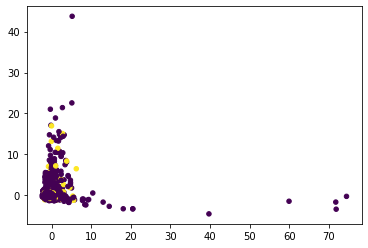

In [10]:
# Generamos un data frame con los Componentes Principales obtenidos
columns = ["pc%d" % i for i in range(1, pca.n_components_+1)]
pca_df = pd.DataFrame(data = pca.transform(scaled_data), columns = columns)
print(pca_df.head(2))

# Visualizamos la proyección de la variable objetivo en los dos primeros componentes principales
plt.scatter(pca_df['pc1'], pca_df['pc2'], c=new_df['P23'].to_numpy(), s=20, cmap='viridis')